# Lecture 2: Intro to Python and Descriptive Statistics

In this notebook you will executing python scripts across the "flights.csv" dataset.  While some of this material may be new, it will be important for you to understand how some programming/scripting/scientific computing languages deal with several of these scenarios.  

We will first start by including the packages we need. all comments within cells will be preceded by a '#'

#######

#### A few tips at jupyter notebooks

When Clicked *inside* a cell:
    - Shift + Enter: allows you to run the current cell and put you in the next cell
    - Alt + Enter: Allows you to run the current cell and create a new cell after it
    
 When clicked outside a cell (when your cursor is not inside the cell):
    - Up and Down keys move across the notebook
    - Hit 'x' to cut a cell
    - Hit 'c' to copy a cell
    - Hit 'v' to paste a cell
    - Hit 'z' to undo an action on a cell (*very useful*)
    

#######

In [104]:
# We import the packages here to allow python to leverage modules that 
#  other open source developers have contributed to.  Pandas is a famous
#  analysis and data munging package that allows you to work with 'data frames'
#  Matplotlib is the most popular, and free, visualisation package 
#
# When we use the 'as' character in an import its simply a way for us to alias
#  the package when referencing it.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

import datetime

## Importing the data set

Once we've imported the packages we will now read in the dataset using pandas.  For simplicity we will assume that this notebook and your data set are in the same folder.  Let's take a first glance of the table

In [11]:
df = pd.read_csv('flights.csv')  # assign the dataframe object to a variable df
df.head(7)  # Show the top 5 rows

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0


We can see there isn't a whole lot of clarity in the data, but we have a mix of different types of data.  Lets to a summary statistic on each column using pandas describe method

In [102]:
df.describe(include='all')

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,328521.000000,328063.000000,327346.000000,336776,334264,336776.000000,336776,336776,327346.000000,336776.000000,328521.000000,328521.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,4043,NaN,3,105,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UA,N725MQ,NaN,EWR,ORD,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58665,575,NaN,120835,17283,NaN,NaN,NaN,NaN
mean,168388.500000,2013.0,6.548510,15.710787,1349.109947,12.639070,1502.054999,6.895377,NaN,NaN,1971.923620,NaN,NaN,150.686460,1039.912604,13.173544,31.755501
std,97219.001466,0.0,3.414457,8.768607,488.281791,40.210061,533.264132,44.633292,NaN,NaN,1632.471938,NaN,NaN,93.688305,733.233033,4.894426,18.230997
min,1.000000,2013.0,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,NaN,NaN,1.000000,NaN,NaN,20.000000,17.000000,0.000000,0.000000
25%,84194.750000,2013.0,4.000000,8.000000,907.000000,-5.000000,1104.000000,-17.000000,NaN,NaN,553.000000,NaN,NaN,82.000000,502.000000,9.000000,16.000000
50%,168388.500000,2013.0,7.000000,16.000000,1401.000000,-2.000000,1535.000000,-5.000000,NaN,NaN,1496.000000,NaN,NaN,129.000000,872.000000,14.000000,31.000000
75%,252582.250000,2013.0,10.000000,23.000000,1744.000000,11.000000,1940.000000,14.000000,NaN,NaN,3465.000000,NaN,NaN,192.000000,1389.000000,17.000000,49.000000



For starters we see that the index has been interpreted as a column.  We get statistics on the the year, seeing there is only on value.   We also get some summary statistic on the discrete values in our dataset such as flight, origin, tailnum, carrier, and destination.  This allows us to recognize instantly what kind of values we're dealing with.  


We'll go through in the next cell to derive the date time use for you to use throught out the notebook


In [115]:

df['flight_date'] = df.apply(lambda x : datetime.datetime(x['year'],int(x['month']),int(x['day'])), axis=1)
df.head(5)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,flight_date
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01


Allowing us to use some time series plots across the year:


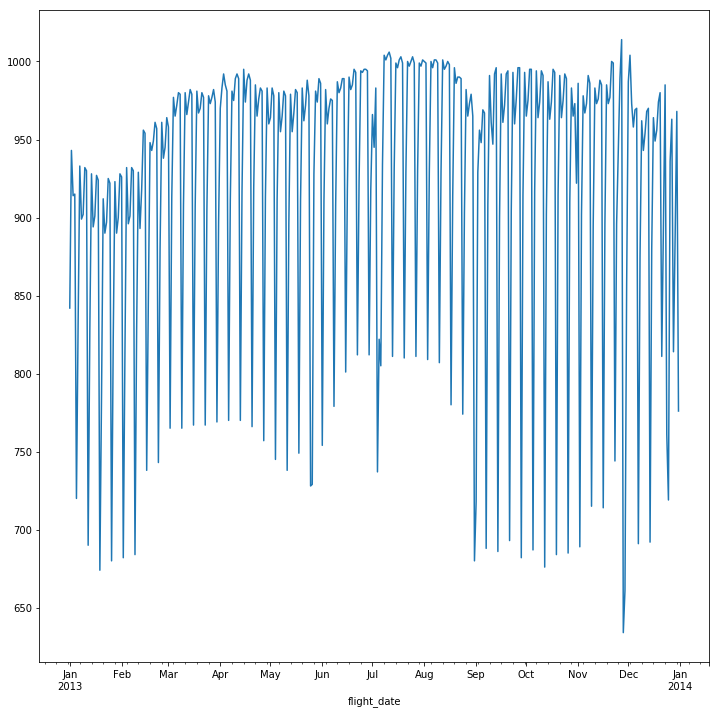

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))


flightsbydate  = df.groupby('flight_date')['flight'].count()
flightsbydate.plot()

We can do some quick graphs on some of the discrete variables

In [37]:
origin_flight_counts = df.groupby('origin')['flight'].count()
origin_flight_counts

origin
EWR    120835
JFK    111279
LGA    104662
Name: flight, dtype: int64

Now using that new grouped by table we created we can now create charts from pandas.  Typically pandas will infer the types and when calling a specific chart (in this case 'bar') it will validate that the values being used are appropriate

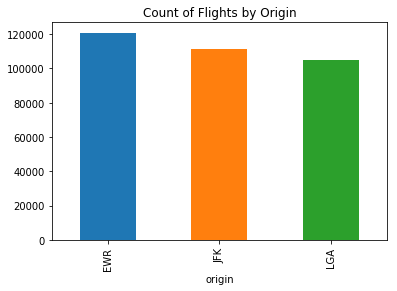

In [53]:
origin_flight_counts.plot('bar',title='Count of Flights by Origin')
plt.show()

How about the most frequent destinations across all our NY Airports?

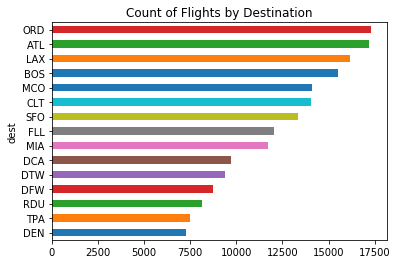

In [65]:
destination_flight_counts = df.groupby('dest')['flight'].count()
destination_flight_counts = destination_flight_counts.sort_values()
destination_flight_counts.tail(15).plot('barh',title='Count of Flights by Destination')
plt.show()

What if we just wanted to see our data from La Guardia Airport?  We can use pandas filter function for ease of interpretability.  
*There are several ways to filter in pandas

In [70]:
laGuardiaFlights = df[df['origin'] == 'LGA']
laGuardiaFlights.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0
14,15,2013,1,1,559.0,-1.0,941.0,31.0,AA,N3DUAA,707,LGA,DFW,257.0,1389,5.0,59.0


### Lets do a few summary statistics on the dataset based on learnings from chapter 2

Some of the summary statistics we learned revolved around the dispersion of the data, lets look at something like the overall time of flight across flights, and look for dispersion

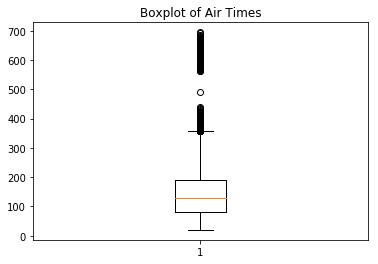

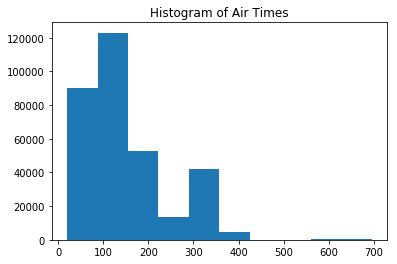

In [86]:
# We take the dataframe and filter the arrival delay by excluding nulls
#  then we take the arr_delay column from that filtered dataset
air_times = df[df['air_time'].notnull()]['air_time']

# We use matplotlibs boxplot function (remember that plt is an alias from the imported package)
plt.boxplot(air_times)
plt.title('Boxplot of Air Times')
plt.show()


plt.hist(air_times)
plt.title('Histogram of Air Times')
plt.show()

We know from our our original statistics mentioned we found that flights can be as short as 20 min and as long as 11 hours.  This mainly depends on the quantiles and we can immediately determine skewness in the data from outliers that extend pass the top whisker.  In the histogram we also see, and confirm, that flight times are less than 200 min.

To really determine the dispersion lets look at the overall variance and standard deviation:

In [120]:
air_time_variance = df['air_time'].var()

print('Air Time Variance: {air_variance}'.format(air_variance = air_time_variance)
      ,'Air Time Standard Deviation: {air_standard_deviation}'.format(air_standard_deviation = np.sqrt(air_time_variance))
     ,sep='\n')

Air Time Variance: 8777.498429877467
Air Time Standard Deviation: 93.68830465899929


Now lets use a network graph to show some of the routes provided by the dataset.  What do you notice from the topology? Which/where are the most diverse origins?

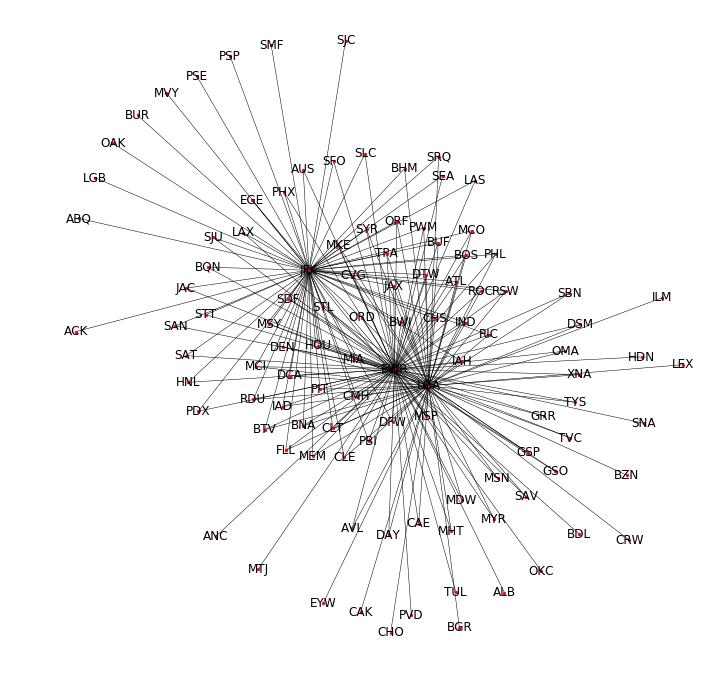

In [101]:

edges= df[['origin','dest']].values
g = nx.from_edgelist(edges)

sg = next(nx.connected_component_subgraphs(g))

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
nx.draw_networkx(sg, ax=ax, with_labels=True,
                 node_size=5, width=.5)
ax.set_axis_off()

# IT Session Assignment

## Question 1: How many flights were there from NYC airports to Seattle in 2013?

## Question 2: Which airlines fly from NYC to Seattle and how many flights for each?

## Question 3: How many unique airplanes fly from NYC to Seattle?

## Question 4: Flights are often delayed. Consider the following questions exploring delay patterns. (a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

## Question 5: What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


## Question 6: How and why might you compare standard deviation across each of the 3 NY Origin airports?


## Question 7: List the data structure type for each column in the flights dataset (i.e ordinal, nominal, continuous, interval, ratio)


## (Extra Credit) Question 8: Which is the busiest time of day across all airports?
